In [1]:

from plot_lib.plot_rainfall import integrate_datetime, RainGauge
import pandas as pd
from datetime import datetime
import os


In [2]:
app = RainGauge()

In [3]:
dft = app.df_interpolate_nan(path='thaiwater.xlsx', rainfall='rainfall')
dft.head()

,station,address,time,rainfall,date,lat,long,english_day,month,day,year
0,บ้านบางกุ่ม,ต.กะปง อ.กะปง จ.พังงา,00:00 น.,2.5,0,8.665887,98.452998,Fri,5,27,2022
1,บ้านทุ่งไพล,ต.เขาแดง อ.สะบ้าย้อย จ.สงขลา,00:00 น.,3.0,0,6.547667,100.836956,Fri,5,27,2022
2,ปตร.กระมัง (ปากคลองข้าวเม่า),ต.หัวรอ อ.พระนครศรีอยุธยา จ.พระนครศรีอยุธยา,00:00 น.,3.0,0,14.355067,100.583584,Fri,5,27,2022
3,บ้านร่มโพธิ์เงิน,ต.ปอ อ.เวียงแก่น จ.เชียงราย,20:00 น.,1.0,0,19.872663,100.488998,Fri,5,27,2022
4,ปราจีนบุรี,ต.หน้าเมือง อ.เมืองปราจีนบุรี จ.ปราจีนบุรี,22:00 น.,3.1,0,14.058418,101.369305,Fri,5,27,2022


In [4]:
dft = integrate_datetime(dft, sum=False)

dft['lat'] = dft['lat'].replace('', 0)
dft['long'] = dft['long'].replace('', 0)
dft

,index,station,address,time,rainfall,date,lat,long,english_day,month,day,year
0,0,บ้านบางกุ่ม,ต.กะปง อ.กะปง จ.พังงา,00:00 น.,2.5,2022-05-27 07:00:00+07:00,8.665887,98.452998,Fri,5,27,2022
1,773,สถานีวิจัยต้นน้ำคีรีวง,ต.กำโลน อ.ลานสกา จ.นครศรีธรรมราช,00:00 น.,0.2,2022-05-27 07:00:00+07:00,8.432136,99.768825,Fri,5,27,2022
2,772,เปร็ดใน,ต.ห้วงน้ำขาว อ.เมืองตราด จ.ตราด,00:00 น.,0.4,2022-05-27 07:00:00+07:00,12.142047,102.529795,Fri,5,27,2022
3,771,ทต.ห้องแซง,ต.ห้องแซง อ.เลิงนกทา จ.ยโสธร,00:00 น.,0.4,2022-05-27 07:00:00+07:00,16.268099,104.405860,Fri,5,27,2022
4,770,สะพานบางไตประชาบริรักษ์,ต.ตะกุกเหนือ อ.วิภาวดี จ.สุราษฎร์ธานี,00:00 น.,0.4,2022-05-27 07:00:00+07:00,9.282494,98.876948,Fri,5,27,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
134263,133127,สถานีหน่วยพิทักษ์ป่าอ่าวท่ายาง,ต.เกาะหมาก อ.ปากพะยูน จ.พัทลุง,22:00,1.4,2022-08-29 07:00:00+07:00,0.000000,0.000000,Mon,8,29,2022
134264,133126,สถานีหน่วยอนุรักษ์และจัดการต้นน้ำคลองอุดม,ต.วังทอง อ.วังสมบูรณ์ จ.สระแก้ว,22:00,1.4,2022-08-29 07:00:00+07:00,0.000000,0.000000,Mon,8,29,2022
134265,133125,สถานีเชียงใหม่,ต.ศรีภูมิ อ.เมืองเชียงใหม่ จ.เชียงใหม่,19:00,1.1,2022-08-29 07:00:00+07:00,0.000000,0.000000,Mon,8,29,2022
134266,133123,สถานีบ้านแม่ป๋ามนอก,ต.ปิงโค้ง อ.เชียงดาว จ.เชียงใหม่,21:00,1.0,2022-08-29 07:00:00+07:00,0.000000,0.000000,Mon,8,29,2022


In [5]:
stations = set(dft['station'])
dft_pos = dft[['station', 'lat', 'long']]
dft_pos


,station,lat,long
0,บ้านบางกุ่ม,8.665887,98.452998
1,สถานีวิจัยต้นน้ำคีรีวง,8.432136,99.768825
2,เปร็ดใน,12.142047,102.529795
3,ทต.ห้องแซง,16.268099,104.405860
4,สะพานบางไตประชาบริรักษ์,9.282494,98.876948
...,...,...,...
134263,สถานีหน่วยพิทักษ์ป่าอ่าวท่ายาง,0.000000,0.000000
134264,สถานีหน่วยอนุรักษ์และจัดการต้นน้ำคลองอุดม,0.000000,0.000000
134265,สถานีเชียงใหม่,0.000000,0.000000
134266,สถานีบ้านแม่ป๋ามนอก,0.000000,0.000000


In [6]:
lst = []
count = 0
for i, station in enumerate(list(set(dft['station']))):
    count += 1
    item = dft_pos.loc[dft_pos['station'] == station].values[0]
    print(item)
    lst.append(item)


[0 14.49604637662732 102.2472238540649]
['สถานีอบต.แม่ระมาด' 0.0 0.0]
['สถานีทต.บ้านใหม่' 0.0 0.0]
['สถานีสุคิริน' 0.0 0.0]
['สถานีบ้านเจ้าพ่อเขาตก' 0.0 0.0]
['บ้านน้ำพริก' 17.19838911478465 100.9119987487793]
['สถานีหน่วยพิทักษ์อุทยานแห่งชาติที่ ผท.๑ (ปากบอก)' 0.0 0.0]
['สถานีสะพานบ้านตรังพัฒนา' 0.0 0.0]
['สถานีบ้านเขาจันทร์' 0.0 0.0]
['หน่วยจัดการต้นน้ำแม่ขะนิง' 18.75279885706381 100.5412423610687]
['สถานีเมืองอุดรธานี' 0.0 0.0]
['บ้านทุ่งลัง' 6.547064825729004 100.734001994133]
['บ้านบางกา' 9.011630697092809 98.91905307769775]
['ทต.ดอยสะเก็ด' 18.86479317459824 99.1323047876358]
['บ้านแม่สายนาเลา' 0.0 0.0]
['สถานีสมุทรปราการ สกษ.' 0.0 0.0]
['สถานีทต.แม่ใจ' 0.0 0.0]
['สถานีบ้านมะขาม ' 0.0 0.0]
['สถานีเหนือปตร.บรมธาตุ' 0.0 0.0]
['เขตป้อมปราบฯ' 13.75825828148286 100.5130416154862]
['สถานีโรงปรับปรุงคุณภาพน้ำฯ ทน.นครสวรรค์' 0.0 0.0]
['บ้านทาป่าเปา' 18.47795042077577 99.18999910354614]
['สถานีบ้านผาตั้ง' 0.0 0.0]
['บ้านหนองนกปีกกา' 17.13070698359714 99.25099790096284]
['บ้านหนองน้ำเย็น*' 

In [7]:
each_station = pd.DataFrame(lst, columns=['station', 'lat', 'long'])
is_station = each_station.loc[each_station['lat'] > 0]
not_station = each_station.loc[each_station['lat'] == 0]
all_stations = len(is_station) + len(not_station)
quotient = len(is_station) / all_stations
percent = quotient * 100

display('total station | ' + str(all_stations))
display('there are stations | ' + str(len(is_station)))
display('is not station | ' + str(len(not_station)))
display('that means its ' + str(percent))

'total station | 5535'

'there are stations | 2697'

'is not station | 2838'

'that means its 48.72628726287263'

In [8]:
is_not_pos= dft.loc[dft['lat'] == 0]
there_pos = dft.loc[dft['lat'] > 0]
all_pos = len(is_not_pos) + len(there_pos)
quotient = len(there_pos) / all_pos
percent = quotient * 100

display(len(is_not_pos))
display(len(there_pos))
display(percent)


93100

41168

30.661065927845797

In [9]:
for pos in is_station.values: dft.loc[dft['station'] == pos[:][0], ['lat', 'long']] = [pos[:][1], pos[:][2]]

In [10]:
dft

,index,station,address,time,rainfall,date,lat,long,english_day,month,day,year
0,0,บ้านบางกุ่ม,ต.กะปง อ.กะปง จ.พังงา,00:00 น.,2.5,2022-05-27 07:00:00+07:00,8.665887,98.452998,Fri,5,27,2022
1,773,สถานีวิจัยต้นน้ำคีรีวง,ต.กำโลน อ.ลานสกา จ.นครศรีธรรมราช,00:00 น.,0.2,2022-05-27 07:00:00+07:00,8.432136,99.768825,Fri,5,27,2022
2,772,เปร็ดใน,ต.ห้วงน้ำขาว อ.เมืองตราด จ.ตราด,00:00 น.,0.4,2022-05-27 07:00:00+07:00,12.142047,102.529795,Fri,5,27,2022
3,771,ทต.ห้องแซง,ต.ห้องแซง อ.เลิงนกทา จ.ยโสธร,00:00 น.,0.4,2022-05-27 07:00:00+07:00,16.268099,104.405860,Fri,5,27,2022
4,770,สะพานบางไตประชาบริรักษ์,ต.ตะกุกเหนือ อ.วิภาวดี จ.สุราษฎร์ธานี,00:00 น.,0.4,2022-05-27 07:00:00+07:00,9.282494,98.876948,Fri,5,27,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
134263,133127,สถานีหน่วยพิทักษ์ป่าอ่าวท่ายาง,ต.เกาะหมาก อ.ปากพะยูน จ.พัทลุง,22:00,1.4,2022-08-29 07:00:00+07:00,0.000000,0.000000,Mon,8,29,2022
134264,133126,สถานีหน่วยอนุรักษ์และจัดการต้นน้ำคลองอุดม,ต.วังทอง อ.วังสมบูรณ์ จ.สระแก้ว,22:00,1.4,2022-08-29 07:00:00+07:00,0.000000,0.000000,Mon,8,29,2022
134265,133125,สถานีเชียงใหม่,ต.ศรีภูมิ อ.เมืองเชียงใหม่ จ.เชียงใหม่,19:00,1.1,2022-08-29 07:00:00+07:00,0.000000,0.000000,Mon,8,29,2022
134266,133123,สถานีบ้านแม่ป๋ามนอก,ต.ปิงโค้ง อ.เชียงดาว จ.เชียงใหม่,21:00,1.0,2022-08-29 07:00:00+07:00,0.000000,0.000000,Mon,8,29,2022


In [11]:
display(len(dft.loc[dft['lat'] == 0]))
display(len(dft.loc[dft['lat'] > 0]))

80802

53466

In [12]:
period = dft.loc[dft['lat'] > 0]
period.groupby(period.date.dt.month)['rainfall'].max()

date
5    374.5
6    536.0
7    245.5
8    113.0
Name: rainfall, dtype: float64

In [14]:
period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53466 entries, 0 to 134252
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype                       
---  ------       --------------  -----                       
 0   index        53466 non-null  int64                       
 1   station      53466 non-null  object                      
 2   address      53466 non-null  object                      
 3   time         53466 non-null  object                      
 4   rainfall     53466 non-null  float64                     
 5   date         53466 non-null  datetime64[ns, Asia/Bangkok]
 6   lat          53466 non-null  float64                     
 7   long         53466 non-null  float64                     
 8   english_day  53466 non-null  object                      
 9   month        53466 non-null  int64                       
 10  day          53466 non-null  int64                       
 11  year         53466 non-null  int64                       
dtypes: 

In [18]:
period

,index,station,address,time,rainfall,date,lat,long,english_day,month,day,year
0,0,บ้านบางกุ่ม,ต.กะปง อ.กะปง จ.พังงา,00:00 น.,2.5,2022-05-27 07:00:00+07:00,8.665887,98.452998,Fri,5,27,2022
1,773,สถานีวิจัยต้นน้ำคีรีวง,ต.กำโลน อ.ลานสกา จ.นครศรีธรรมราช,00:00 น.,0.2,2022-05-27 07:00:00+07:00,8.432136,99.768825,Fri,5,27,2022
2,772,เปร็ดใน,ต.ห้วงน้ำขาว อ.เมืองตราด จ.ตราด,00:00 น.,0.4,2022-05-27 07:00:00+07:00,12.142047,102.529795,Fri,5,27,2022
3,771,ทต.ห้องแซง,ต.ห้องแซง อ.เลิงนกทา จ.ยโสธร,00:00 น.,0.4,2022-05-27 07:00:00+07:00,16.268099,104.405860,Fri,5,27,2022
4,770,สะพานบางไตประชาบริรักษ์,ต.ตะกุกเหนือ อ.วิภาวดี จ.สุราษฎร์ธานี,00:00 น.,0.4,2022-05-27 07:00:00+07:00,9.282494,98.876948,Fri,5,27,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
133869,133284,0,ต.สามเสนใน อ.พญาไท จ.กรุงเทพมหานคร,22:00,4.0,2022-08-29 07:00:00+07:00,14.496046,102.247224,Mon,8,29,2022
133985,133405,0,ต.หนองหว้า อ.เมืองหนองบัวลำภู จ.หนองบัวลำภู,22:00,2.6,2022-08-29 07:00:00+07:00,14.496046,102.247224,Mon,8,29,2022
134028,133336,0,ต.มะขามเฒ่า อ.วัดสิงห์ จ.ชัยนาท,22:00,2.4,2022-08-29 07:00:00+07:00,14.496046,102.247224,Mon,8,29,2022
134048,133343,0,ต.หาดท่าเสา อ.เมืองชัยนาท จ.ชัยนาท,22:00,2.2,2022-08-29 07:00:00+07:00,14.496046,102.247224,Mon,8,29,2022


<AxesSubplot: xlabel='date'>

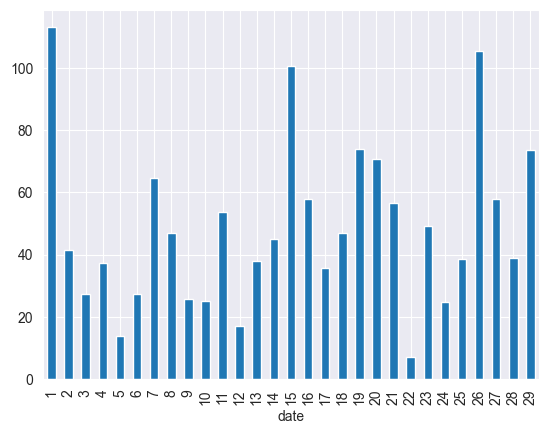

In [24]:
# df05 = app.filter_dates(period, start_date='2022-05-01', end_date='2022-05-31')
# df06 = app.filter_dates(period, start_date='2022-06-01', end_date='2022-06-30')
# df07 = app.filter_dates(period, start_date='2022-07-01', end_date='2022-07-31')
# df08 = app.filter_dates(period, start_date='2022-08-01', end_date='2022-08-31')
# df05.groupby(df05.date.dt.day)['rainfall'].max().plot.bar()
# df06.groupby(df06.date.dt.day)['rainfall'].max().plot.bar()
# df07.groupby(df07.date.dt.day)['rainfall'].max().plot.bar()
# df08.groupby(df08.date.dt.day)['rainfall'].max().plot.bar()

In [ ]:
# pd.set_option('display.max_rows', None)
# display(period)

In [ ]:
dft.info()

In [ ]:
# dft['date'] = dft['date'].dt.strftime('%Y-%m-%d')
# dft.head()

In [ ]:
# dft = dft.astype({'date': 'object'})
# dft.info()

In [ ]:
# dft.to_excel('../assets/results/new_thaiwater.xlsx', engine='xlsxwriter')